# 导入第三方库

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from random import *
from math import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from collections import Counter
from itertools import cycle
from sklearn import svm, datasets
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib as mpl
import seaborn as sns

# 数据输入和准备

In [2]:
df=pd.read_csv("sintax_rdp.fixed.txt",sep="\t")
sample = df[["OTUID","label3"]]

import re
alldata = pd.DataFrame() 
for i in range(len(np.array(sample)[:,1])):
    result = re.split(",|:", np.array(sample)[:,1][i])
    result = [i.replace('"', '') for i in result]
    alldata = pd.DataFrame(pd.concat([alldata,np.transpose(pd.DataFrame(result))],axis=0))
alldata.index = sample["OTUID"]
alldata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
OTUID,,,,,,,,,,,,,,
Otu1,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Prevotellaceae,g,Prevotella,s,Prevotella_copri
Otu3,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Bacteroidaceae,g,Bacteroides,s,Bacteroides_plebeius
Otu2,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Bacteroidaceae,g,Bacteroides,NaN,NaN
Otu4,d,Bacteria,p,Firmicutes,c,Clostridia,o,Clostridiales,f,Ruminococcaceae,g,Faecalibacterium,s,Faecalibacterium_prausnitzii
Otu5,d,Bacteria,p,Bacteroidetes,c,Bacteroidia,o,Bacteroidales,f,Prevotellaceae,g,Prevotella,s,Prevotella_copri


In [3]:
all_sample = alldata.iloc[:,np.arange(1,14,2)]
all_sample.columns = ["Kingdom","Phylum","Class","Order","Family","Genus","Species"]
all_sample.head()
# all_sample.to_csv("all_data_wuzhongxinxi.csv",index=1)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTUID,,,,,,,
Otu1,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella_copri
Otu3,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides_plebeius
Otu2,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
Otu4,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,Faecalibacterium_prausnitzii
Otu5,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella_copri


In [4]:
otu_label = pd.read_csv("otu_label_all0316.csv",header=0,index_col=0)
otu_label
label = otu_label["label"]
otu = otu_label.drop(["label"],axis=1)

In [5]:
Counter(label)
otu

,Otu133,Otu2,Otu159,Otu138,Otu37,Otu13,Otu26,Otu60,Otu4,Otu112,...,Otu317,Otu428,Otu439,Otu289,Otu336,Otu421,Otu481,Otu344,Otu469,Otu151
Sample,,,,,,,,,,,,,,,,,,,,,
CR001,28.836548,5.255339,11.098433,0.493024,0.512401,1.952721,3.044265,0.234671,0.671719,0.344471,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000
CR002,0.125912,11.829357,0.179265,0.049084,0.674378,0.554868,2.151180,0.264629,5.740749,3.877673,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000
CR003,0.688369,4.867433,0.448550,0.066616,0.759426,2.447040,0.719456,0.346405,3.250877,0.548474,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000
CR004,1.116356,3.435229,0.232262,0.198546,0.299693,0.816663,0.584401,0.382108,2.581104,0.348393,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000
CR005,0.808314,5.688834,0.820097,0.103690,0.245086,0.332281,0.645709,4.357355,3.117783,0.282792,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRK01,0.000000,3.941439,0.002198,0.065947,0.131894,0.162670,0.833132,0.028577,2.793959,0.048361,...,0.0,0.0,0.000000,0.052758,0.061551,0.0,0.00000,0.0,0.0,0.00000
XRK02,0.000000,0.545700,0.000000,0.002140,0.027820,0.064200,0.012840,0.000000,4.048878,0.012840,...,0.0,0.0,0.000000,8.844615,9.863254,0.0,0.00856,0.0,0.0,0.00214
XRK03,0.000000,19.314012,0.146350,0.030919,0.282393,0.505009,0.020613,0.049470,0.152533,0.350414,...,0.0,0.0,0.002061,0.037103,0.113369,0.0,0.01649,0.0,0.0,0.00000


In [6]:
map_otu = np.transpose(otu)
result_otu = pd.concat([all_sample["Genus"],map_otu],axis=1)
result_otu.head()

,Genus,CR001,CR002,CR003,CR004,CR005,CR006,CR007,CR008,CR009,...,XRJ06,XRJ07,XRJ08,XRJ09,XRJ10,XRK01,XRK02,XRK03,XRK04,XRK05
Otu1,Prevotella,0.428436,0.687183,10.696363,1.146325,0.374700,0.378136,1.446560,1.499034,1.243503,...,2.619043,4.488453,4.915329,5.328752,7.756694,11.131872,17.430290,0.218494,10.627782,0.968851
Otu3,Bacteroides,2.478040,2.294165,9.779278,0.824155,0.355847,0.742686,0.821966,1.449939,0.944771,...,1.170665,2.480292,4.767341,1.741394,0.796964,0.340727,1.010079,0.657542,0.002051,0.985519
Otu2,Bacteroides,5.255339,11.829357,4.867433,3.435229,5.688834,6.790599,17.785939,6.179426,7.631029,...,11.296490,12.516824,11.001882,13.551292,5.135990,3.941439,0.545700,19.314012,1.927849,2.910720
Otu4,Faecalibacterium,0.671719,5.740749,3.250877,2.581104,3.117783,3.919482,3.800030,1.701961,5.314033,...,1.719681,1.709073,1.524281,1.455430,1.650854,2.793959,4.048878,0.152533,0.324043,0.056256
Otu5,Prevotella,1.018343,0.140851,3.082116,0.490747,0.136683,0.122272,0.727027,0.886983,1.352795,...,4.451945,11.305518,8.798968,5.369299,15.760067,0.076938,0.239680,0.076267,18.499149,1.871028


In [7]:
filter_otu = result_otu[result_otu["CR001"].isnull()==False]
filter_otu = filter_otu.fillna("unassigned")
# 按属求和
temp1 = list(set(filter_otu["Genus"]))
genus = pd.DataFrame(index=temp1,columns=otu.index)
for i in range(len(temp1)):
    temp2 = filter_otu[filter_otu["Genus"]==temp1[i]].drop(["Genus"],axis=1).sum(axis=0)
    genus.iloc[i,:] = temp2
genus.sum(axis=0)

Sample
CR001    100.0
CR002    100.0
CR003    100.0
CR004    100.0
CR005    100.0
         ...  
XRK01    100.0
XRK02    100.0
XRK03    100.0
XRK04    100.0
XRK05    100.0
Length: 987, dtype: float64

In [8]:
filter_otu.columns[filter_otu.dtypes != "object"]

Index(['CR001', 'CR002', 'CR003', 'CR004', 'CR005', 'CR006', 'CR007', 'CR008',
       'CR009', 'CR010',
       ...
       'XRJ06', 'XRJ07', 'XRJ08', 'XRJ09', 'XRJ10', 'XRK01', 'XRK02', 'XRK03',
       'XRK04', 'XRK05'],
      dtype='object', length=987)

In [9]:
genus = np.transpose(genus)
genus.head()

,Lachnospiracea_incertae_sedis,Sutterella,Holdemanella,Fusobacterium,Veillonella,Anaerotruncus,Odoribacter,Barnesiella,Romboutsia,Clostridium_XVIII,...,Haemophilus,Bilophila,Bacteroides,Clostridium_IV,Escherichia/Shigella,Akkermansia,Butyricimonas,Eisenbergiella,Alistipes,Roseburia
Sample,,,,,,,,,,,,,,,,,,,,,
CR001,0.772907,0.0732001,0,14.6702,0.501636,0.0452118,0.258353,0.0495177,0.0129177,0.0925766,...,0.0172236,0.137788,26.6858,0.0366001,1.43386,29.7817,0.0129177,0.0344471,0.471495,0.927919
CR002,1.99966,0.23902,0.0490845,0.691451,0.313714,0.040548,0.335055,0,0.0106705,0.0448163,...,0.00640232,0.134449,42.0547,0.102437,2.08502,0.136583,0.040548,0.0704255,0.595416,1.16522
CR003,0.981481,0.155438,0,1.66763,0.304215,0.0266465,0.348625,0.0177644,0.0310876,0.193187,...,0.0155438,0.168761,38.4554,0.073278,1.57437,0.919305,0.0932629,0.0799396,0.635076,2.25385
CR004,1.42354,0.108639,0,0.415824,23.6907,0.131116,0.457032,0.0187308,0.0337154,0.153593,...,0.0487001,0.0824155,19.7198,0.944032,1.18379,1.84311,0.191054,0.0974002,1.52843,2.55114
CR005,4.85695,0.881369,0.0047132,6.79644,1.08404,0.212094,0.940284,0.082481,0.0424188,0.263939,...,0.0636282,0.160249,34.7057,0.0895508,2.4815,4.42098,0.047132,0.386483,1.14295,3.71165


In [10]:
label[label=="CR"] = "CRC"
label[label=="NM"] = "HI"

<ipython-input-10-ac5a3571fcf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="CR"] = "CRC"
<ipython-input-10-ac5a3571fcf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="NM"] = "HI"


In [11]:
result = pd.concat([label,genus],axis=1)
result.to_csv("genusdata_filter0318.csv",index=1)
result = pd.read_csv("genusdata_filter0318.csv",index_col=0,sep = ",")

In [12]:
list_custom = ['CRC', 'AA', "NAA","PL","HI"]

# 设置成“category”数据类型
result['label'] = result['label'].astype('category')
# inplace = True，使 recorder_categories生效
result['label'].cat.reorder_categories(list_custom, inplace=True)
# inplace = True，使 df生效
result.sort_values('label', inplace=True)
result

,label,Lachnospiracea_incertae_sedis,Sutterella,Holdemanella,Fusobacterium,Veillonella,Anaerotruncus,Odoribacter,Barnesiella,Romboutsia,...,Haemophilus,Bilophila,Bacteroides,Clostridium_IV,Escherichia/Shigella,Akkermansia,Butyricimonas,Eisenbergiella,Alistipes,Roseburia
Sample,,,,,,,,,,,,,,,,,,,,,
CR001,CRC,0.772907,0.073200,0.000000,14.670169,0.501636,0.045212,0.258353,0.049518,0.012918,...,0.017224,0.137788,26.685756,0.036600,1.433862,29.781691,0.012918,0.034447,0.471495,0.927919
CRC08,CRC,0.798957,0.029435,1.522224,0.069383,0.006308,0.014718,0.252302,0.067281,0.088306,...,0.025230,0.096716,10.537824,0.168202,0.103023,0.027333,0.021025,0.006308,0.710651,7.249485
CRC09,CRC,1.302269,0.047591,0.008653,0.599217,0.021632,0.073550,0.504034,0.069224,0.025959,...,0.103835,0.129794,47.526337,0.114652,0.253099,0.010816,0.568932,0.019469,8.092673,2.074545
CRC10,CRC,0.692078,1.049687,0.006311,0.094661,0.016829,0.012621,0.065211,0.004207,0.044175,...,0.183011,0.067315,22.577727,0.084143,0.172494,0.071522,0.002104,0.010518,0.475409,3.138542
CRD01,CRC,3.498886,0.025232,0.018924,10.488246,0.077800,0.018924,0.115648,0.027335,0.016822,...,0.025232,0.027335,58.793473,0.212372,1.002986,0.033643,0.010513,0.039951,0.492031,1.324698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JKD01,HI,5.081858,0.095571,0.008310,0.027009,0.002078,0.002078,0.041552,0.043630,0.101803,...,0.004155,0.039475,18.694424,0.199452,0.344885,0.012466,0.006233,0.004155,0.934929,2.746613
JKC10,HI,1.455915,0.355611,0.020918,0.029286,0.096224,0.008367,0.027194,0.035561,0.096224,...,0.035561,0.023010,15.807970,0.050204,0.263571,0.000000,0.023010,0.012551,0.209183,9.070181
JKC09,HI,1.836484,0.060315,0.228781,0.070714,0.037437,0.006239,0.066554,0.058235,0.049916,...,0.014559,0.020798,54.878226,0.056155,0.391007,0.006239,0.006239,0.004160,2.518666,2.599780


In [13]:
data = pd.DataFrame(result[["label","Bacteroides","Prevotella","Clostridium_sensu_stricto","Dialister","Fusobacterium"]])
# data = pd.DataFrame(result[["label","Bacteroides","Prevotella"]])
data.to_csv("genus_boxplot.csv")
# sns.pairplot(data,hue="label")
# plt.savefig("genus-feature_xianguan.svg",format="svg")

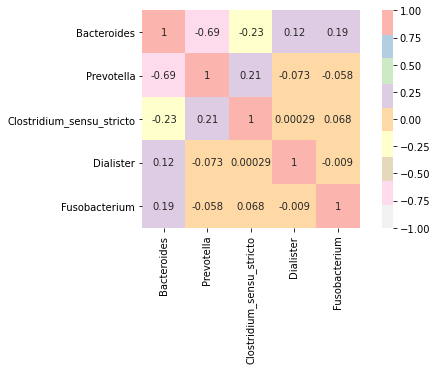

In [15]:
import scipy.stats as ss
#导入相应的模块
plt.figure(figsize=(8,4))
sns.set_context(font_scale=1.5)
#设置字体大小为1.5倍
df = pd.DataFrame(result[["Bacteroides","Prevotella","Clostridium_sensu_stricto","Dialister","Fusobacterium"]])
df.to_csv("otu-genus-xiangguang.csv")
otu_genus_xiangguan = df.corr("spearman")

# otu_genus_xiangguan.to_csv("genus_xiangguang.csv")
# #读入数据
g = sns.heatmap(df.corr("spearman"),vmin=-1,vmax=1,cmap=sns.color_palette('Pastel1_r',n_colors=128),annot=True, square=True)
#画热力图，图例最小值 -1，最大值1，颜色对象设为红蓝('RdBu'),颜色数目为128
plt.savefig("genus-xianguan-retu.svg",format="svg")

In [13]:
otu_label = result.drop(["label"],axis=1)
path = pd.read_csv("path_abun_unstrat_descrip.tsv",sep="\t",index_col=0)
path = path.drop(["description"],axis=1)
path = np.transpose(path)
path = path[path.index.isin(otu_label.index)]

In [14]:
path.head()

pathway,1CMET2-PWY,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,AEROBACTINSYN-PWY,ALL-CHORISMATE-PWY,ANAEROFRUCAT-PWY,ANAGLYCOLYSIS-PWY,ARG+POLYAMINE-SYN,ARGDEG-PWY,ARGORNPROST-PWY,ARGSYN-PWY,...,TCA-GLYOX-BYPASS,TEICHOICACID-PWY,THISYN-PWY,THREOCAT-PWY,THRESYN-PWY,TRNA-CHARGING-PWY,TRPSYN-PWY,UBISYN-PWY,UDPNAGSYN-PWY,VALSYN-PWY
CR001,32230.2273,694.5569,10.43,4051.1986,29973.1615,38751.2067,8430.2221,1202.0481,1084.9857,21694.2552,...,2697.7151,1461.8689,26525.9490,2241.6937,38795.1897,33011.3041,26074.7815,1587.1356,17049.1555,34117.3310
CR002,34060.9026,68.1146,5.75,1855.1362,26151.6250,40676.4780,7916.7289,680.3925,957.9890,28522.1542,...,1339.9272,1560.9015,29434.1770,679.3949,40212.2150,34989.3640,34912.5693,926.1407,17598.8308,39952.5880
CR003,31421.9230,267.7577,19.02,2063.5692,26279.5557,39001.2257,6512.8718,735.6725,997.8472,22869.8498,...,1680.1613,1872.6372,28893.5757,1007.3668,37381.4994,32514.4587,31610.1179,954.2608,12217.2411,38069.7064
CR004,20396.8249,86.4889,23.51,1397.7013,18108.6011,24845.9695,11033.2417,290.7071,1302.7280,18693.2453,...,614.6341,1089.7304,15702.4294,1075.5901,24070.0388,22521.6072,21289.0397,636.0561,16420.3402,26251.9532
CR005,33178.9310,165.2496,39.84,2912.9505,28802.5438,41708.5750,9005.6567,770.6389,2673.5818,21828.3239,...,1698.9843,2546.4982,26245.8380,971.0502,37029.1409,35948.6019,31786.8243,1394.9044,18233.2662,41505.7641


In [65]:
# otu_corr = otu_label[["Bacteroides","Prevotella","Clostridium_sensu_stricto","Dialister","Fusobacterium","Alistipes",\
#                       "Clostridium_XlVa","Clostridium_XlVb","Blautia","Ruminococcus2","Parabacteroides","Roseburia","Romboutsia","Anaerostipes","Barnesiella",\
#                       "Lachnospiracea_incertae_sedis","Faecalibacterium","Odoribacter","Intestinibacter"]]
otu_corr

,Alloprevotella,Anaerostipes,Barnesiella,Bilophila,Clostridium_IV,Clostridium_XVIII,Eubacterium,Faecalibacterium,Flavonifractor,Fusicatenibacter,Gemmiger,Intestinibacter,Megamonas,Megasphaera,Oscillibacter,Romboutsia,Ruminococcus,Ruminococcus2
Sample,,,,,,,,,,,,,,,,,,
CR001,0.000000,0.096883,0.049518,0.137788,0.036600,0.092577,0.131330,2.379004,0.167930,0.021529,0.208836,0.012918,0.798743,0.006459,0.243283,0.012918,0.105494,0.376765
CR002,0.000000,0.064023,0.000000,0.134449,0.102437,0.044816,0.247556,30.105852,0.153656,0.053353,0.670110,0.012805,0.738401,0.034146,0.288104,0.010671,0.113108,0.808827
CR003,0.002221,0.048852,0.017764,0.168761,0.073278,0.193187,0.111027,9.088689,0.159879,0.104366,0.366390,0.013323,0.250922,0.004441,0.135453,0.031088,0.135453,0.495181
CR004,0.000000,0.074923,0.018731,0.082416,0.944032,0.153593,0.198546,11.193527,0.153593,0.221023,0.782947,0.018731,0.179816,0.108639,0.588147,0.033715,0.543193,1.273694
CR005,0.000000,0.063628,0.082481,0.160249,0.089551,0.263939,0.238017,6.254419,0.136683,0.311071,0.603290,0.021209,0.207381,0.016496,0.289862,0.042419,1.340906,2.712448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRK01,1.235409,0.028577,0.131894,0.019784,0.153877,0.244004,1.231013,9.562331,0.206634,0.529775,1.250797,0.010991,1.428854,0.021982,0.751797,0.019784,0.441846,0.353916
XRK02,9.886794,0.002140,0.002140,0.000000,0.010700,0.042800,0.126260,4.941257,0.008560,0.055640,0.321000,0.002140,0.389480,0.010700,0.019260,0.029960,0.049220,0.100580
XRK03,0.138104,0.008245,0.008245,0.008245,0.020613,0.098941,0.958486,7.393742,0.368966,0.533867,0.043286,0.010306,1.218205,0.010306,0.022674,0.032980,0.272086,0.113369


In [16]:
max_corr_index = []
max_corr =[]
for j in range(otu_corr.columns.size):
    corr = []
    for i in range(path.columns.size):
        t =np.corrcoef(path.iloc[:,i],otu_corr.iloc[:,j])[0][1]
        corr.append(t)
    max_corr_index.append(corr.index(max(corr, key = abs)))
    max_corr.append(max(corr))

In [17]:
path_corr = pd.DataFrame([path.columns[max_corr_index],max_corr])
path_corr.columns = otu_corr.columns
path_corr.index = ["path","corr_num"]
# path_corr.to_csv("path_corr.csv",index=1)

In [74]:
path_retu = path[list(set(np.transpose(path_corr)["path"]))]

In [75]:
path_retu

pathway,METH-ACETATE-PWY,ARGORNPROST-PWY,PWY-6876,PWY-7221,PWY-621,PWY-7374,SALVADEHYPOX-PWY,P162-PWY,PWY-5384,P124-PWY,P221-PWY,PWY-5532,P161-PWY,PWY-4984,P108-PWY
CR001,820.8988,1084.9857,31.9839,33815.1057,16704.1258,206.2526,7266.1926,13945.0010,9421.4257,2107.7964,261.5083,401.3480,10144.6327,8026.5172,29239.4479
CR002,1936.7726,957.9890,41.9601,37102.0436,19103.8371,256.0097,6779.6419,2222.8378,4441.1656,1835.5090,853.5551,264.5417,27052.8313,8327.5038,30197.4762
CR003,1545.9148,997.8472,35.9626,33691.7382,19475.9197,297.8553,6501.7673,2581.8452,5134.8313,1684.7980,362.5845,185.3751,16541.6143,6812.4339,27629.1467
CR004,1496.8657,1302.7280,51.9298,23250.7863,11215.9968,273.1382,6362.5429,1743.1882,4369.0054,3489.0764,174.1024,174.8867,10185.0654,3523.8033,16659.1164
CR005,2065.1843,2673.5818,139.6014,37476.7485,23588.1076,434.1846,11122.4056,6561.2995,7436.7098,5414.4749,610.5662,333.0610,14994.0654,7402.7290,27837.6989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRK01,2282.6887,3561.4842,33.9763,31163.5876,25504.0790,275.0102,13036.8368,1290.0017,12048.9572,9387.7205,127.1719,643.3032,21939.4847,2053.9981,12907.4747
XRK02,516.2396,160.5157,135.3331,21626.7631,10891.8079,40.4929,762.8061,7908.0116,1052.6311,259.6735,130.8790,11.3334,5824.0495,741.3860,6930.5835
XRK03,1227.2690,567.0070,13.9937,39423.8075,20024.3500,73.7233,5007.3167,592.1065,7414.8586,3202.5408,11.9879,138.6395,11465.5370,4011.9803,37696.9310
XRK04,573.2252,372.1564,166.2250,17118.9228,10483.5991,223.3878,2659.6157,1232.8129,2006.2086,1153.9130,51.2517,23.7061,5153.3226,2712.5742,7038.5359


In [92]:
def retumatrix(path_retu,otu_corr):
    retu_matrix = pd.DataFrame(index=path_retu.columns,columns=otu_corr.columns)
    for j in range(otu_corr.columns.size):
        corr = []
        for i in range(path_retu.columns.size):
            t =np.corrcoef(path_retu.iloc[:,i],otu_corr.iloc[:,j])[0][1]
            corr.append(t)
        retu_matrix.iloc[:,j] = corr
    return retu_matrix

In [88]:
label_corr = pd.read_csv("PL-NM",sep="\t",index_col=0)
label_corr = label_corr.index
otu_pl = otu_label[label_corr]

label_corr = pd.read_csv("NAA-NM",sep="\t",index_col=0)
label_corr = label_corr.index
otu_naa = otu_label[label_corr]

label_corr = pd.read_csv("AA-NM",sep="\t",index_col=0)
label_corr = label_corr.index
otu_aa = otu_label[label_corr]

label_corr = pd.read_csv("CR-NM",sep="\t",index_col=0)
label_corr = label_corr.index
otu_cr = otu_label[label_corr]

In [94]:
retu_pl = retumatrix(path_retu,otu_pl)
retu_naa = retumatrix(path_retu,otu_naa)
retu_aa = retumatrix(path_retu,otu_aa)
retu_cr = retumatrix(path_retu,otu_cr)

In [96]:
retu_all = pd.concat([retu_pl,retu_naa,retu_aa,retu_cr],axis=1)

In [ ]:
#左侧颜色条
row_c = dict(zip(pd_iris['class'].unique(), ['green','yellow','pink']))
sns.clustermap(data=pd_iris,
               col_colors=pd_iris['class'].map(row_c), #行方向聚类用颜色区分不同类               
              )

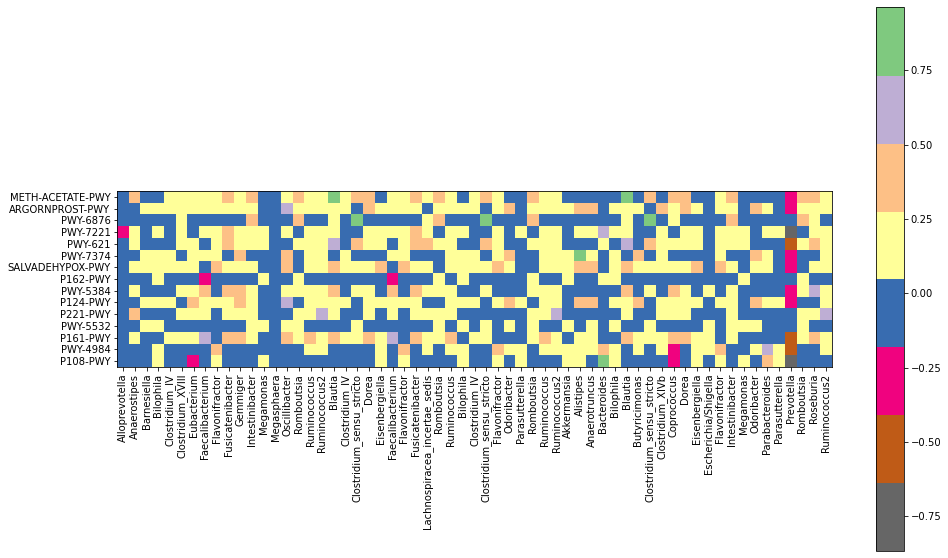

In [154]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(16,10))
    ind_x = cm.columns
    ind_y = cm.index
    x, y = np.meshgrid(len(ind_x),len(ind_y))
    plt.imshow(cm, interpolation='nearest',cmap="Accent_r")
    plt.colorbar()
    xlocations = np.array(range(len(ind_x)))
    ylocations = np.array(range(len(ind_y)))
    plt.xticks(xlocations, ind_x, rotation=90)
    plt.yticks(ylocations, ind_y)
#     plt.tight_layout(rect=[2,4,4,5])
    plt.savefig("retu-matrix.svg",format="svg")
plot_confusion_matrix(retu_all)

In [158]:
retu_aa

,Bilophila,Clostridium_IV,Clostridium_sensu_stricto,Flavonifractor,Odoribacter,Parasutterella,Romboutsia,Ruminococcus,Ruminococcus2
pathway,,,,,,,,,
METH-ACETATE-PWY,-0.076323,0.077760,0.331551,0.088310,-0.116068,-0.019896,0.289112,0.186878,0.062995
ARGORNPROST-PWY,0.173632,0.248548,0.019899,0.097169,0.420251,0.013140,0.072381,0.260015,0.251735
PWY-6876,-0.096082,0.010124,0.886829,-0.080960,-0.112808,-0.042221,0.320544,-0.003999,-0.085567
PWY-7221,0.104828,0.018707,0.037740,0.215108,0.027404,0.118652,-0.021815,0.174217,0.162335
PWY-621,-0.038037,0.019413,0.312628,0.069370,-0.100227,-0.045604,0.139779,0.098129,0.111037
PWY-7374,0.143070,0.074460,-0.112777,0.113276,0.303541,0.028289,-0.095540,0.120168,0.214877
SALVADEHYPOX-PWY,0.147895,0.179426,0.166948,0.283436,0.215760,0.042082,-0.034084,0.143492,0.135193
P162-PWY,0.055612,-0.086581,-0.000703,0.006128,-0.048728,-0.001659,0.081493,-0.139736,-0.033514
PWY-5384,-0.065282,0.044922,0.195758,-0.007339,-0.053108,-0.051428,0.071874,0.215307,0.063101
